In [8]:
import pandas as pd
%matplotlib inline

mdl = pd.read_csv('dataset/DSProjectData.csv', skipinitialspace=True, low_memory=False)

In [9]:
mdl['Date']=pd.to_datetime(mdl['Date'])

In [10]:
mdl.head().sort_values('Date')

,Server Name,Week,CPU %,RAM,Date
0,CALBIPRD01,Wk 1,0.2260,6.2,2017-01-07
1,CALBIPRD01,Wk 2,0.1264,6.2,2017-01-14
2,CALBIPRD01,Wk 3,0.4300,5.6,2017-01-21
3,CALBIPRD01,Wk 4,0.0850,5.7,2017-01-28
4,CALBIPRD01,Wk 5,0.1200,6.2,2017-02-04


In [11]:
mdl06=mdl[mdl['Server Name']=='CALBIPRD06']

<B>CALPBPRD06 RAM<B>

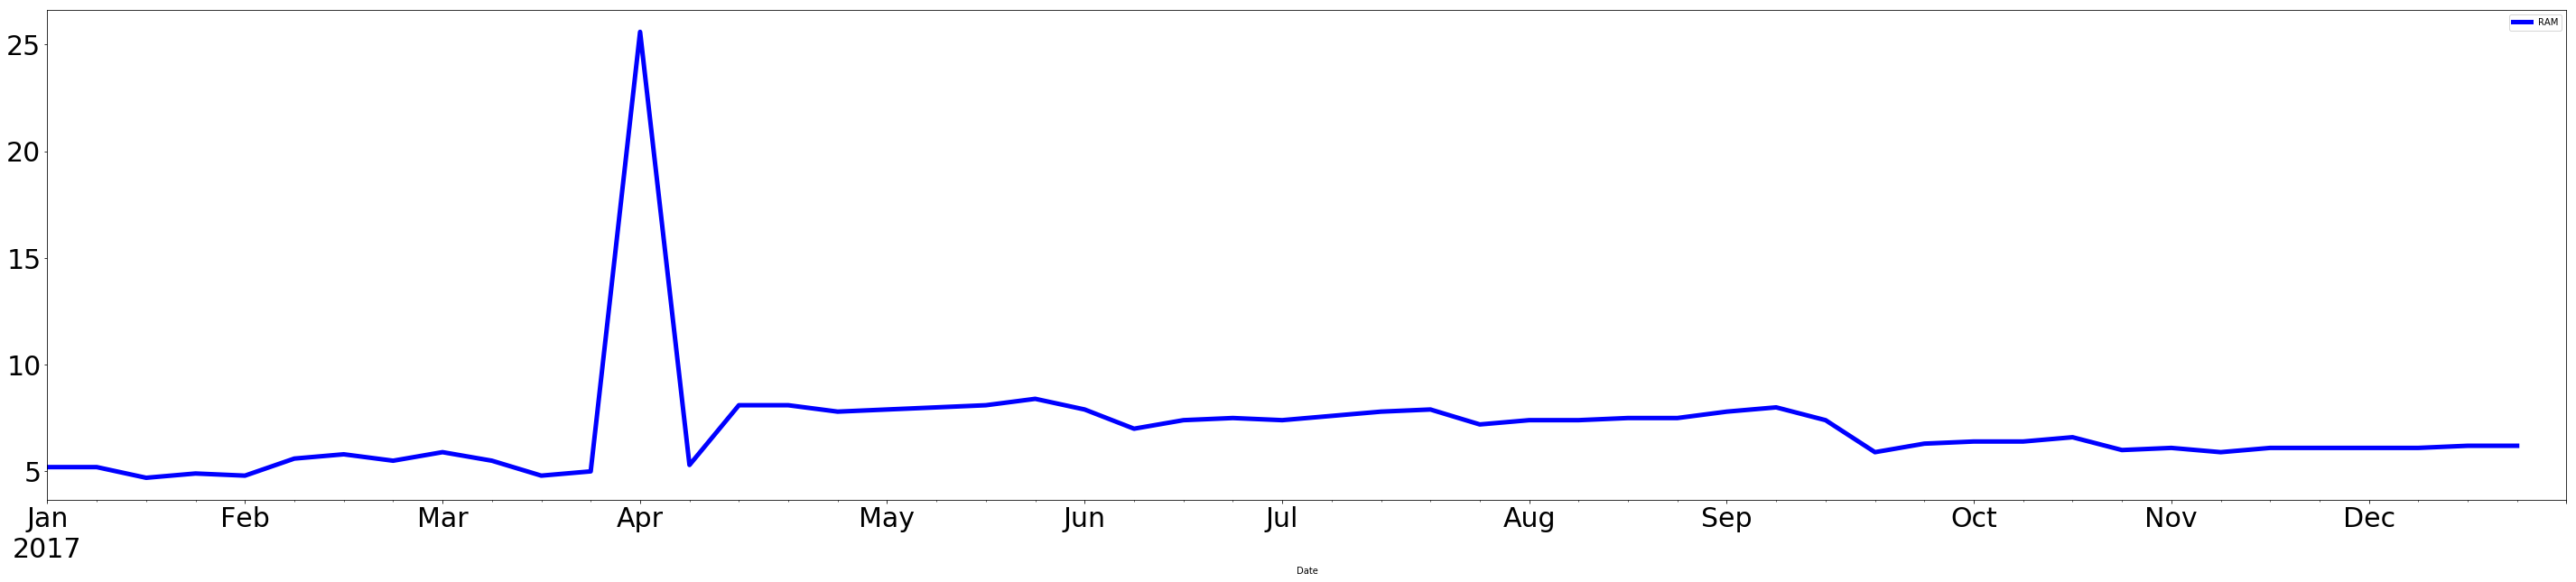

In [12]:
mdl06.plot(kind='line', figsize=(50,10), fontsize=30 , legend=True, linewidth=5.0, x='Date', y='RAM', color ='blue')

In [13]:
mdl06.set_index('Date', inplace=True)
mdl06['Month']= mdl06.index.month
mdl06['Day']=mdl06.index.day

/Users/francispaulraj/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/francispaulraj/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
mdl06.head()

,Server Name,Week,CPU %,RAM,Month,Day
Date,,,,,,
2017-01-07,CALBIPRD06,Wk 1,0.368,5.2,1,7
2017-01-14,CALBIPRD06,Wk 2,0.205,5.2,1,14
2017-01-21,CALBIPRD06,Wk 3,0.850,4.7,1,21
2017-01-28,CALBIPRD06,Wk 4,0.155,4.9,1,28
2017-02-04,CALBIPRD06,Wk 5,0.145,4.8,2,4


<B>CALBIPRD06 RAM (Rolling One Month)</B>

/Users/francispaulraj/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  """Entry point for launching an IPython kernel.


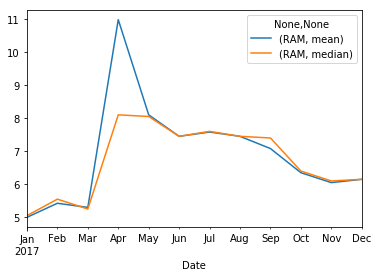

In [16]:
mdl06[['RAM']].resample('M', how =['mean','median']).rolling(window =1, center =True).mean().plot()
#eda_time01[['RAM']].resample('M', how =['median','mean']).plot()

<b>Autocorrlation for RAM - Week / Month Difference<b>

In [17]:
print 'CALBIPRD06 RAM Week Corr', mdl06['RAM'].dropna().resample('D').mean().autocorr(lag=7)
print 'CALBIPRD06 RAM Month Corr', mdl06['RAM'].resample('M').mean().autocorr(lag=1)

CALBIPRD06 RAM Week Corr -0.039055550173
CALBIPRD06 RAM Month Corr 0.219901602643


<b>Autocorrlation for RAM - lags 1, 2, 3, 4, 5, 6, 7, 12, 24</b>
<br>Rule 2: If the lag-1 autocorrelation is zero or negative, or the autocorrelations are all small and patternless,
then the series does not need a higher order of differencing.</br>

In [18]:
print 'diff(!) lag =1 :', mdl06['RAM'].dropna().diff(1).dropna().autocorr(lag=1)
print 'diff(2) lag =1 :', mdl06['RAM'].dropna().diff(2).dropna().autocorr(lag=1)
print 'lag =1 :', mdl06['RAM'].dropna().autocorr(lag=1)
print 'lag =2 :', mdl06['RAM'].dropna().autocorr(lag=2)
print 'lag =3 :', mdl06['RAM'].dropna().autocorr(lag=3)
print 'lag =4 :', mdl06['RAM'].dropna().autocorr(lag=4)
print 'lag =5 :', mdl06['RAM'].dropna().autocorr(lag=5)
print 'lag =6 :', mdl06['RAM'].dropna().autocorr(lag=6)
print 'lag =7 :', mdl06['RAM'].dropna().autocorr(lag=7)
print 'lag =12 :', mdl06['RAM'].dropna().autocorr(lag=12)
print 'lag =24 :', mdl06['RAM'].dropna().autocorr(lag=24)
print 'lag =24 :', mdl06['RAM'].dropna().autocorr(lag=34)

diff(!) lag =1 : -0.553377599605
diff(2) lag =1 : -0.07124433324
lag =1 : -0.039055550173
lag =2 : 0.0671461667946
lag =3 : 0.0813787165385
lag =4 : 0.0653465292631
lag =5 : 0.0349818812191
lag =6 : 0.045969894139
lag =7 : 0.0260172245452
lag =12 : -0.107696770027
lag =24 : -0.146640840763
lag =24 : -0.192440743466


<b> CALBIPRD06 RAM Autocorrlation - Month Lag 1 to 11</b>

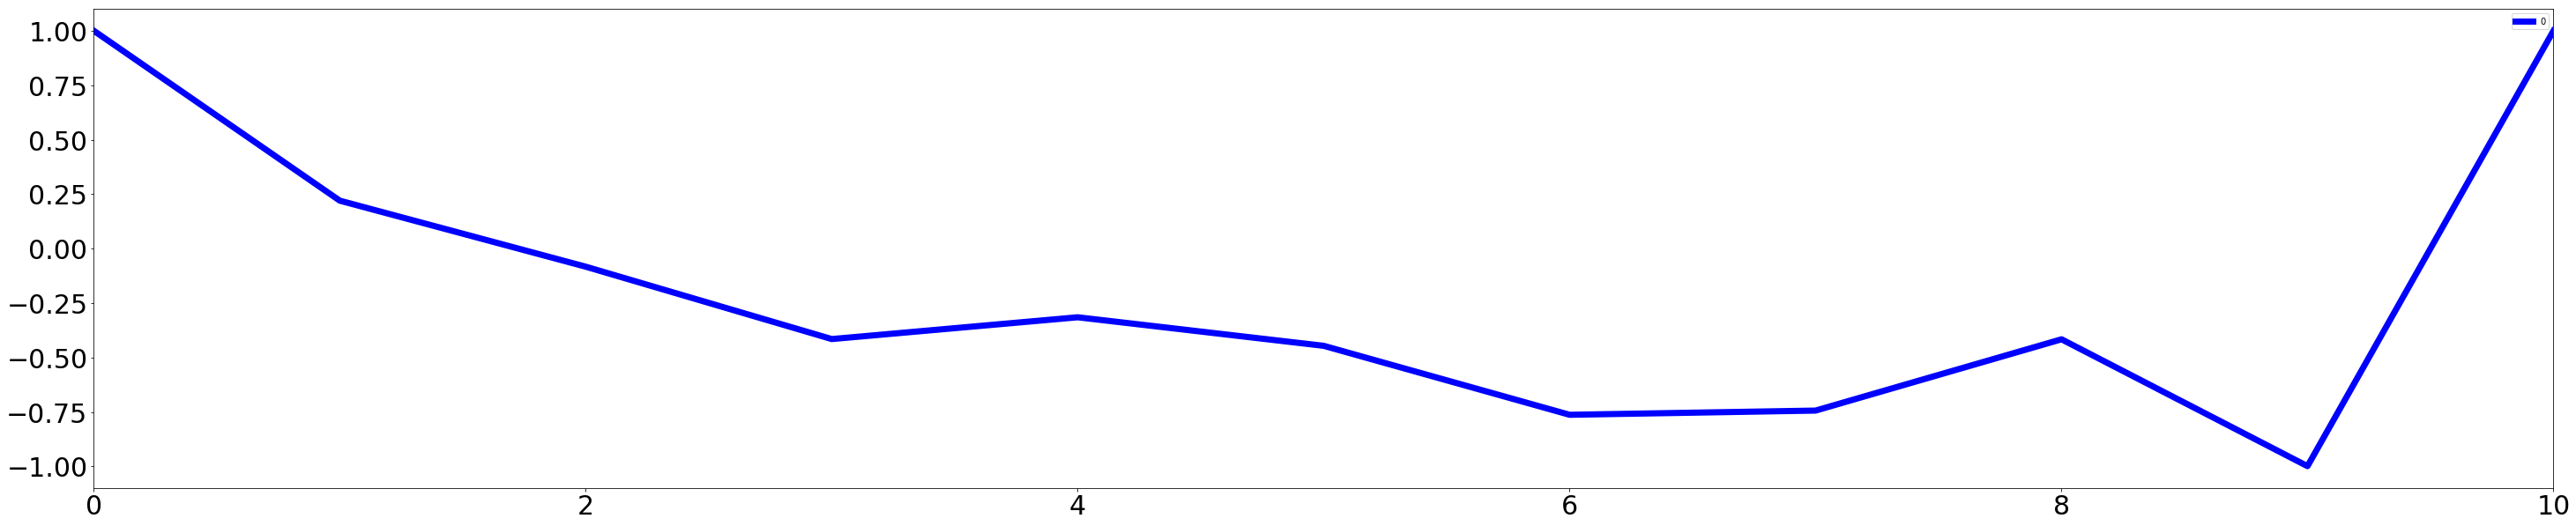

In [19]:
autoc = []

for i in range(11):
    autoc.append(mdl06['RAM'].resample('M').mean().autocorr(lag=1*i))
                 
df = pd.DataFrame(autoc)
df.plot(figsize=(50,10), fontsize=30, legend=True, color ='blue', linewidth=7.0)

<b> CALBIPRD06 RAM Autocorrlation - Week Lag 1 to 51</b>

/Users/francispaulraj/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3159: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/francispaulraj/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3093: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


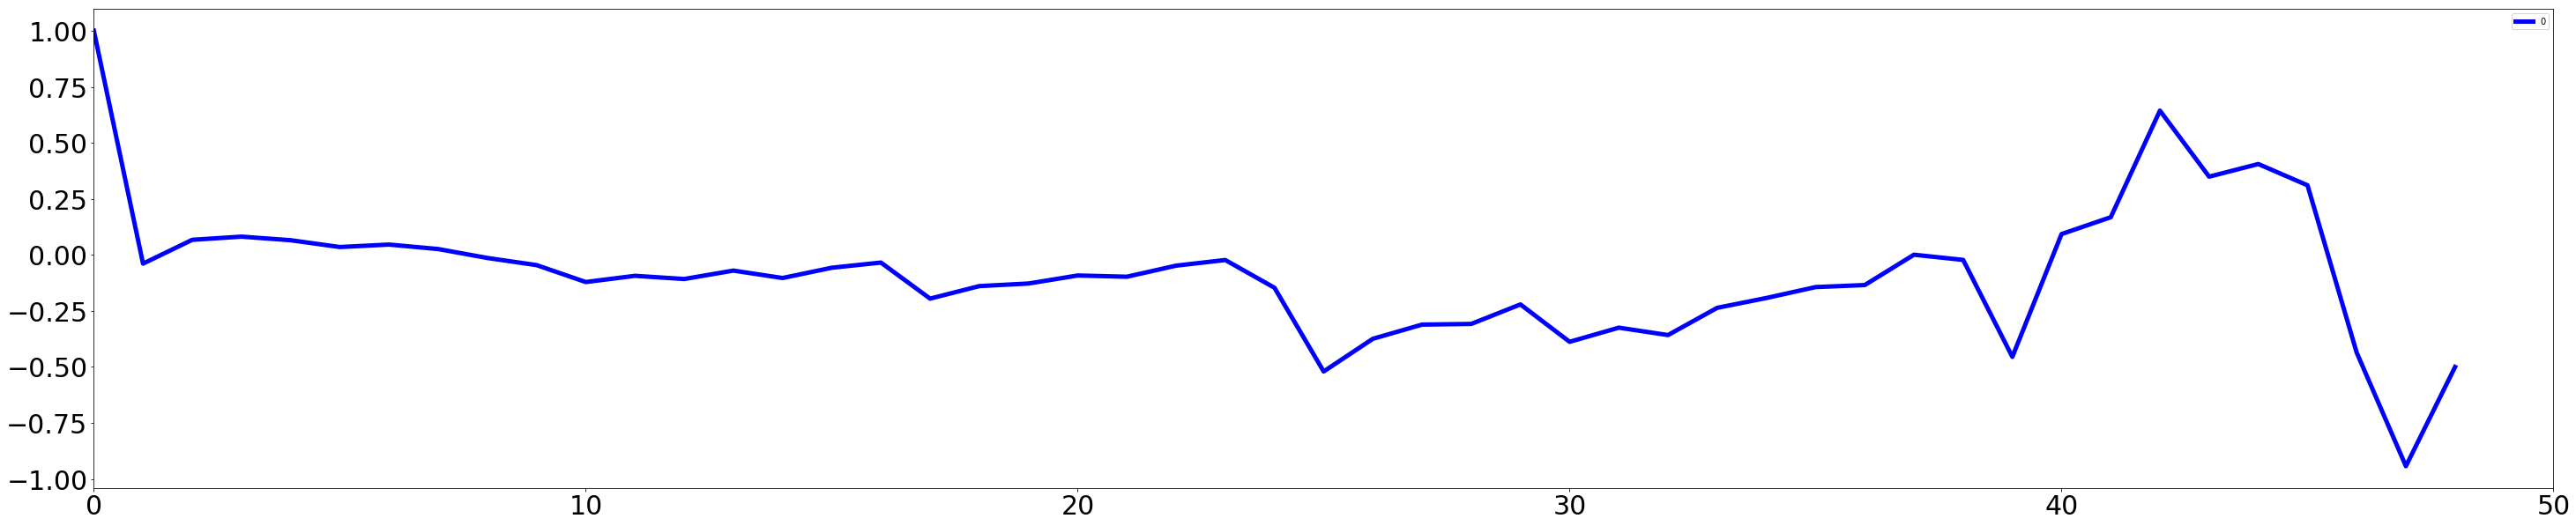

In [20]:
autoc = []

for i in range(51):
    autoc.append(mdl06['RAM'].resample('D').mean().autocorr(lag=7*i))
                 
df = pd.DataFrame(autoc)
df.plot(figsize=(50,10), fontsize=30, legend=True, color ='blue', linewidth=5.0)

<b>This shows a typical pattern of an autocorrelation plot, that it should
decrease to 0 as lag increases.</b>

/Users/francispaulraj/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


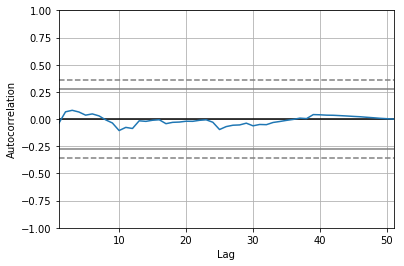

In [21]:
%matplotlib inline
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(mdl06['RAM'].dropna())

<B>Statsmodels Autocorrelation </B>
<br>lags = 1 for Week, lags = 4 for Month, lags = 12 for Quater, lags = 24 for Half yearly</br>
<br><b>Question:</b> for lags = 48, seasonality goes out of confident intvervel, Why? <br> 

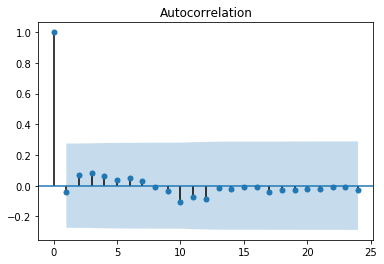

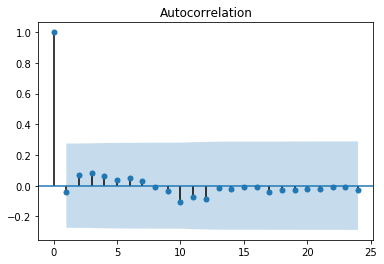

In [23]:
from statsmodels.graphics.tsaplots import plot_acf
#plot_acf(mdl01['RAM'].dropna(),lags=24) #lag=70 for seasanlity, lags =25
#plot_acf(mdl06['RAM'].dropna().diff(1).dropna(),lags=24) 
plot_acf(mdl06['RAM'].dropna(),lags=24) 

<b> Trend has been observed  as non-stationary, 'diff' of 1 used to make it stationary </b>
<br>Note:</br>
<br> <font color ='red'>Autocorrelation (-0.039055550173) for lag 1,</font> so we expect AR(1) should be between 0 and 1. If we observed a handful of random distributed spikes, a moving average modelwould be useful. </br>

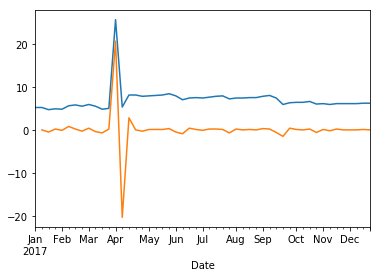

In [24]:
mdl06['RAM'].dropna().plot()
mdl06['RAM'].dropna().diff(1).dropna().plot()

In [27]:
from statsmodels.tsa.arima_model import ARMA

#mdl06a = mdl06[['RAM']].dropna().diff(1).dropna().astype(float)
mdl06a = mdl06[['RAM']].dropna().astype(float)
modela = ARMA(mdl06a, (1,0)).fit() # if coef is >1 then use diff, check this coef is ~ coef of autocorrlation
modela.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    RAM   No. Observations:                   51
Model:                     ARMA(1, 0)   Log Likelihood                -125.592
Method:                       css-mle   S.D. of innovations              2.840
Date:                Sat, 06 Jan 2018   AIC                            257.183
Time:                        20:18:16   BIC                            262.979
Sample:                    01-07-2017   HQIC                           259.398
                         - 12-23-2017                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0078      0.383     18.286      0.000       6.257       7.759
ar.L1.RAM     -0.0384      0.139     -0.276      0.784      -0.311       0.234
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -26.0284           +0.0000j           26.0284            0.5000
-----------------------------------------------------------------------------
"""

<b>Note:</b>
<br>1 . From the ARMA Model Result (AR=1, MA=0), it has been observed that 'RAM' coef is 0.8957 which is high and P <.05, so 'diff' 1 used to make it stationary and P value is < .05 which is significant.</br>
<br> <font color ='red'>1. When diff =0 AR coef is -0.0384 and autocorrelation at lag 1 with diff(0) is -0.039055550173 and P 0.784 > .05 </font> </br>
<br><font color ='red'> 2. When diff =1 AR coef is -0.5427 and autocorrelation at lag 1 with diff(1) is -0.553377599605 and P 0.000 <.05</font> 
</br> 


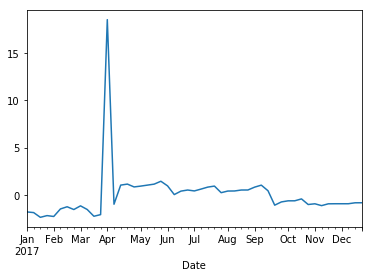

In [28]:
modela.resid.plot()

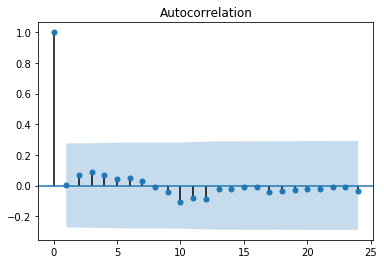

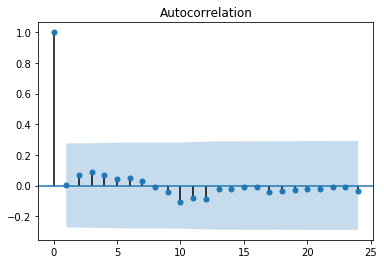

In [29]:
plot_acf(modela.resid, lags=24)

In [26]:
#mdl01 = mdl01[['CPU %']].dropna().astype(float)
#model = ARMA(mdl01, (1, 1)).fit()
#model.summary()

In [31]:
#mdl06m = mdl06[['RAM']].dropna().diff(1).dropna().astype(float)
mdl06m = mdl06[['RAM']].dropna().astype(float)
modelm = ARMA(mdl06m, (0, 1)).fit()
modelm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    RAM   No. Observations:                   51
Model:                     ARMA(0, 1)   Log Likelihood                -125.596
Method:                       css-mle   S.D. of innovations              2.840
Date:                Sat, 06 Jan 2018   AIC                            257.193
Time:                        20:19:00   BIC                            262.988
Sample:                    01-07-2017   HQIC                           259.407
                         - 12-23-2017                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0077      0.385     18.223      0.000       6.254       7.761
ma.L1.RAM     -0.0338      0.130     -0.260      0.796      -0.289       0.221
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           29.6251           +0.0000j           29.6251            0.0000
-----------------------------------------------------------------------------
"""

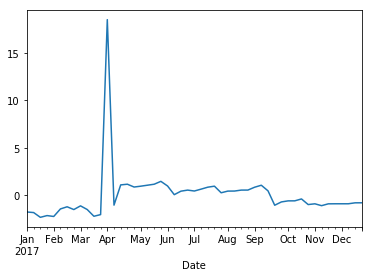

In [32]:
modelm.resid.plot()

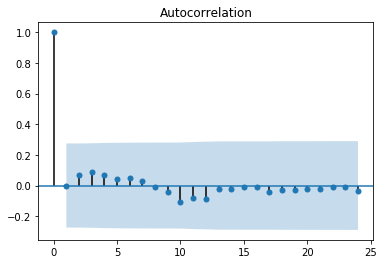

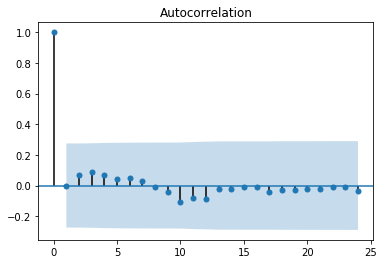

In [33]:
plot_acf(modelm.resid, lags=24)

<b>Ask ARMA(0,1) how to predict</b>

<b>ARIMA</b>

In [36]:
from statsmodels.tsa.arima_model import ARIMA
mdl06 = mdl06[['RAM']].dropna().astype(float)
model = ARIMA(mdl06, (1, 0, 0)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    RAM   No. Observations:                   51
Model:                     ARMA(1, 0)   Log Likelihood                -125.592
Method:                       css-mle   S.D. of innovations              2.840
Date:                Sat, 06 Jan 2018   AIC                            257.183
Time:                        20:19:40   BIC                            262.979
Sample:                    01-07-2017   HQIC                           259.398
                         - 12-23-2017                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0078      0.383     18.286      0.000       6.257       7.759
ar.L1.RAM     -0.0384      0.139     -0.276      0.784      -0.311       0.234
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -26.0284           +0.0000j           26.0284            0.5000
-----------------------------------------------------------------------------
"""

In [39]:
#mdl06['RAM'].dropna().diff(1).dropna().autocorr(1)
mdl06['RAM'].dropna().autocorr(1)

-0.039055550173045302

<b>Note:</b>
<br><font color ='red'>From ARIMA (1,0,0) coef is -0.0384 and diff(0).autocorr(1) is -0.03905 which is not same <b>what it indicates,</b> P value is 0.784 > .05 which is not significate </font></br>
<br>Check: 1. Does this model match the lag 1 autocorrelation of the differenced series? 2. Is the data stationary?</br>


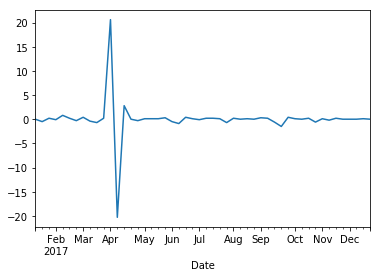

In [40]:
#model.resid.plot()
mdl06['RAM'].dropna().diff(1).dropna().plot()

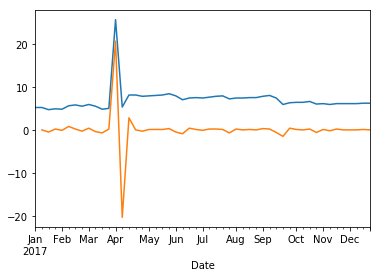

In [41]:
mdl06['RAM'].dropna().plot()
mdl06['RAM'].dropna().diff(1).dropna().plot()

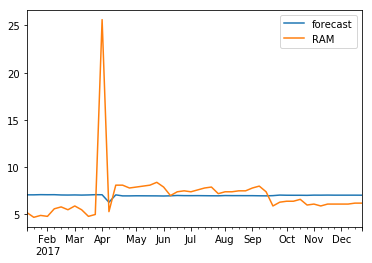

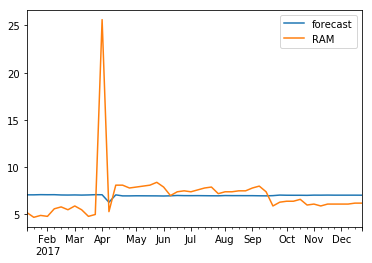

In [42]:
model.plot_predict(1, 50)

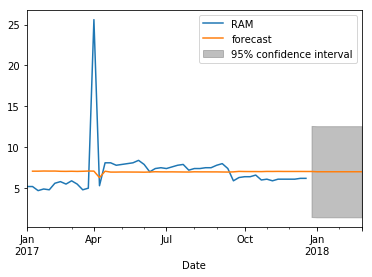

In [44]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax = mdl06['RAM'].dropna().plot(ax=ax)
fig = model.plot_predict(1,60, ax=ax, plot_insample=False)

<b>Predit from AR(1) model</b>

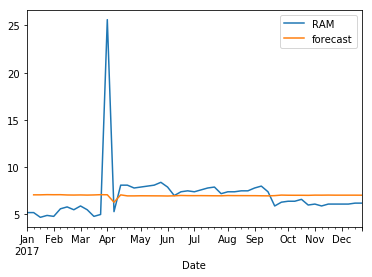

In [45]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax = mdl06['RAM'].dropna().plot(ax=ax)
fig = modela.plot_predict(1,50, ax=ax, plot_insample=False)

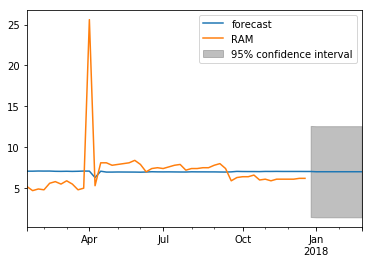

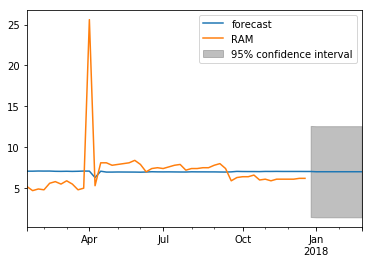

In [46]:
modela.plot_predict(1, 60)